<a href="https://colab.research.google.com/github/tinaghimire/data-mining/blob/main/Lab-4_KNN/Room_occupancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Coding/Occupancy_Estimation.csv')
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [5]:
categorical = df.select_dtypes('object').columns
categorical

Index(['Date', 'Time'], dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
df['Room_Occupancy_Count'].value_counts()

Room_Occupancy_Count
0    8228
2     748
3     694
1     459
Name: count, dtype: int64

In [8]:
# label_encoder = LabelEncoder()
# df['label'] = label_encoder.fit_transform(df['label'])
# df['label'] = df['label'].map({'male': 0, 'female': 1})
# df.head()

In [9]:
df['Room_Occupancy_Count'].value_counts()

Room_Occupancy_Count
0    8228
2     748
3     694
1     459
Name: count, dtype: int64

In [10]:
df.shape

(10129, 19)

In [11]:
df[['Date', 'Time']].value_counts().sum()

10129

In [12]:
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [13]:
X = df.drop('Room_Occupancy_Count', axis=1)
y = df['Room_Occupancy_Count']

In [14]:
X.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0


In [15]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Room_Occupancy_Count, dtype: int64

In [16]:
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR
0,-1.463033,-1.357775,-1.162334,-1.049684,1.873305,0.118627,0.321099,1.366226,-0.278432,0.262426,-0.237223,-0.363288,-0.354382,0.664469,-0.314749,-0.294029
1,-1.463033,-1.357775,-1.162334,-0.881342,1.873305,0.103769,0.321099,1.366226,2.405552,-0.262923,-0.237223,-0.363288,-0.354382,0.558817,-0.314749,-0.294029
2,-1.292255,-1.357775,-1.302764,-0.881342,1.873305,0.118627,0.321099,1.366226,0.826738,-0.037773,-0.188869,-0.363288,-0.354382,0.449864,-0.314749,-0.294029
3,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.321099,1.366226,0.763585,-0.075298,-0.140515,-0.114690,-0.354382,0.337609,-0.314749,-0.294029
4,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.338223,1.366226,0.037331,-0.225398,-0.237223,-0.363288,-0.354382,0.222053,-0.314749,-0.294029


In [19]:
X_scaled.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR
count,1.012900e+04,1.012900e+04,1.012900e+04,1.012900e+04,1.012900e+04,1.012900e+04,1.012900e+04,1.012900e+04,1.012900e+04,1.012900e+04,1.012900e+04,1.012900e+04,1.012900e+04,1.012900e+04,1.012900e+04,10129.000000
mean,-3.434512e-15,5.533380e-15,4.781379e-15,-6.779233e-15,8.979116e-17,-1.122390e-17,-4.489558e-17,-1.010151e-16,-2.244779e-17,-5.611948e-17,-8.417922e-17,-1.094330e-16,-8.979116e-17,-3.086571e-17,-7.856727e-17,0.000000
std,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049
min,-1.463033e+00,-1.357775e+00,-1.443193e+00,-2.284195e+00,-4.988372e-01,-3.865670e-01,-5.864683e-01,-6.744599e-01,-3.415843e-01,-3.004478e-01,-2.855770e-01,-4.461540e-01,-5.794322e-01,-5.400593e+00,-3.147489e-01,-0.294029
25%,-7.514583e-01,-6.073017e-01,-8.580709e-01,-8.813419e-01,-4.988372e-01,-3.865670e-01,-5.864683e-01,-6.744599e-01,-3.100080e-01,-2.629229e-01,-2.372230e-01,-3.632881e-01,-5.294209e-01,-3.547318e-02,-3.147489e-01,-0.294029
50%,-2.106611e-01,-2.832335e-01,-2.729490e-01,-1.157295e-02,-4.988372e-01,-3.865670e-01,-5.864683e-01,-6.744599e-01,-2.784317e-01,-2.629229e-01,-2.372230e-01,-1.975562e-01,-5.044153e-01,4.146165e-03,-3.147489e-01,-0.294029
75%,5.009141e-01,1.431719e-01,7.568655e-01,6.898537e-01,-2.635834e-01,-1.785459e-01,2.697274e-01,4.479174e-01,-2.784317e-01,-2.253979e-01,-2.130460e-01,-3.182432e-02,2.070265e-02,4.146165e-03,-3.147489e-01,-0.294029
max,2.635640e+00,5.891117e+00,2.652660e+00,2.261049e+00,2.735902e+00,3.446966e+00,4.208228e+00,3.100809e+00,1.172055e+01,1.245804e+01,8.490675e+00,2.731394e+01,4.046607e+00,7.713410e+00,3.177136e+00,3.401029


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=43)

# Default Knn

In [21]:
from sklearn.neighbors import KNeighborsClassifier

#KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
output.head()

,Actual,Predicted
1040,0,0
9417,0,0
2604,0,0
1530,0,0
314,3,3


In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
euclidean_knn = accuracy_score(y_test, y_pred)

In [25]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1668
           1       0.98      0.95      0.96        97
           2       0.96      0.95      0.95       132
           3       0.93      0.99      0.96       129

    accuracy                           0.99      2026
   macro avg       0.97      0.97      0.97      2026
weighted avg       0.99      0.99      0.99      2026



In [26]:
y_test, y_pred

(1040    0
 9417    0
 2604    0
 1530    0
 314     3
        ..
 8712    0
 1231    0
 8409    0
 7233    0
 1992    0
 Name: Room_Occupancy_Count, Length: 2026, dtype: int64,
 array([0, 0, 0, ..., 0, 0, 0]))

In [27]:
y_pred.dtype, y_test.dtype
y_test = np.array(y_test)
y_pred = np.array(y_pred)

In [28]:
cm = confusion_matrix(y_test, y_pred)
cm
cm.astype(int)

array([[1665,    2,    0,    1],
       [   0,   92,    4,    1],
       [   0,    0,  125,    7],
       [   0,    0,    1,  128]])

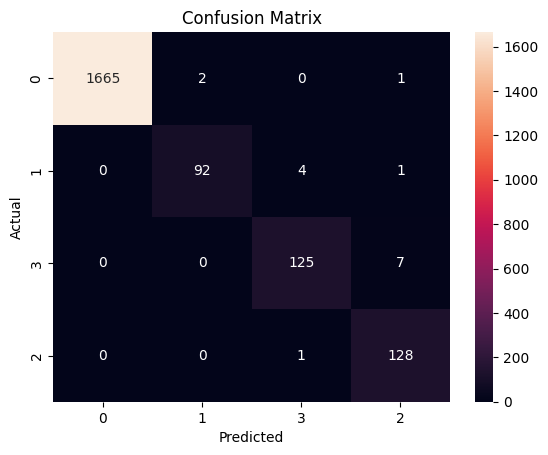

In [29]:
targets = y_train.unique()

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5, 2.5, 3.5], targets)
plt.yticks([0.5, 1.5, 2.5, 3.5], targets)
plt.title('Confusion Matrix')
plt.show()

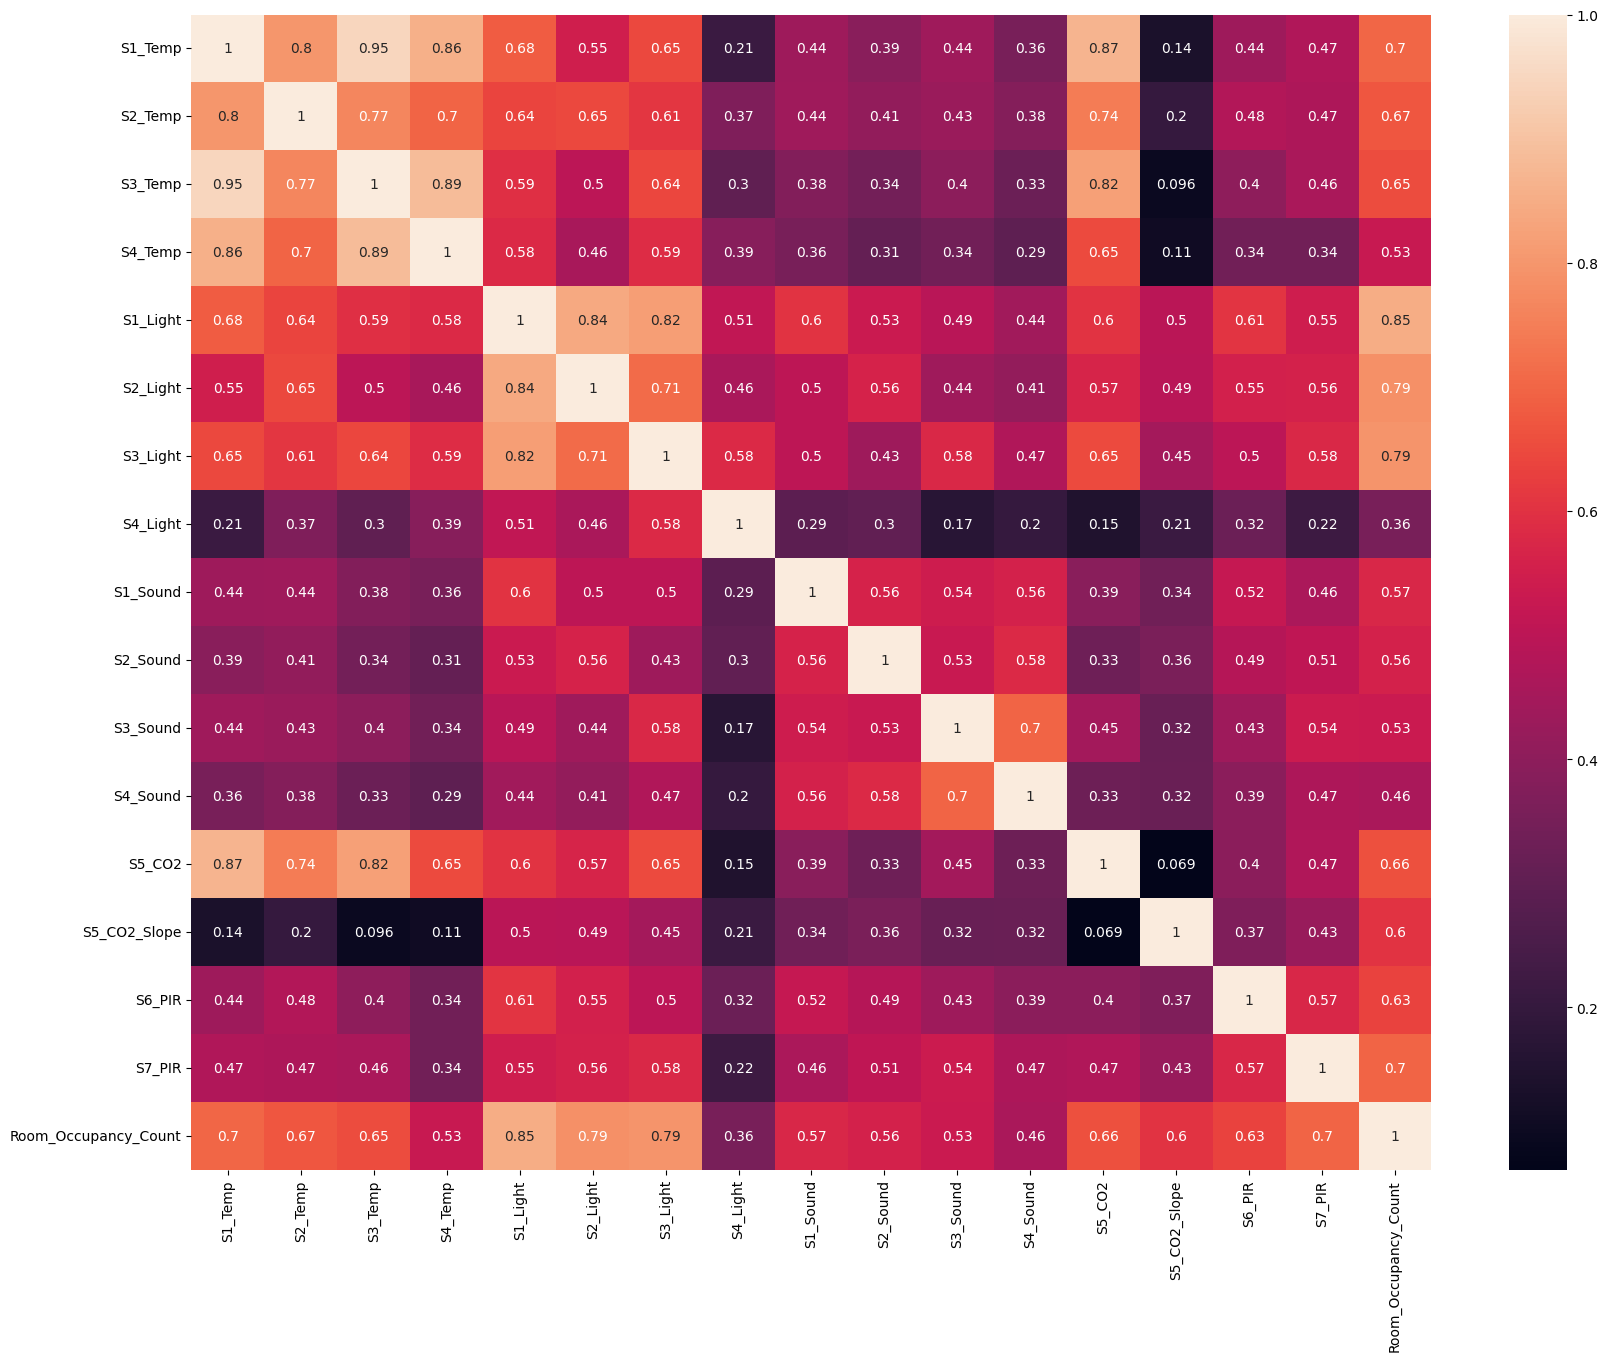

In [30]:
var = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(var, annot=True)
plt.show()

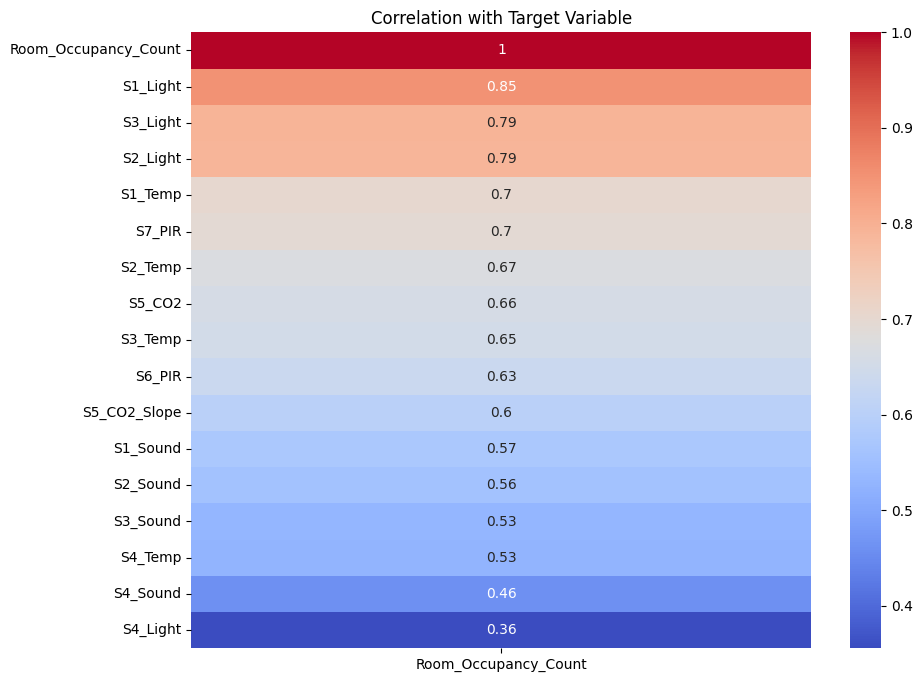

In [31]:
target = 'Room_Occupancy_Count'  # Replace with your actual target variable name
target_correlations = var[[target]].sort_values(by=target, ascending=False)

# Step 4: Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(target_correlations, annot=True, cmap='coolwarm')
plt.title('Correlation with Target Variable')
plt.show()


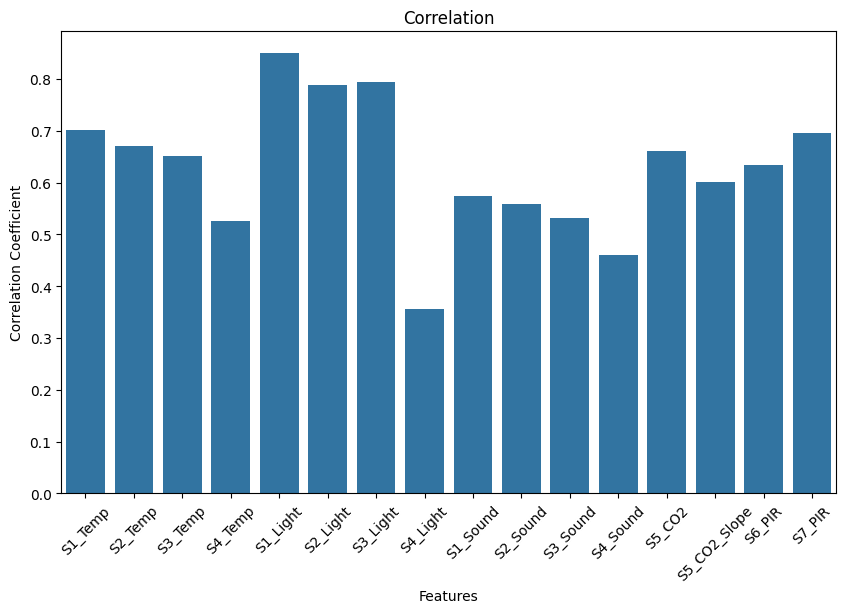

In [32]:
correlations = df.corr()['Room_Occupancy_Count'].drop('Room_Occupancy_Count')  # Drop 'Class' column since we want feature correlations

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=correlations)
plt.title('Correlation')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

In [33]:
correlations_sorted = correlations.sort_values(ascending=False)[:5]
correlations_sorted

S1_Light    0.849058
S3_Light    0.793081
S2_Light    0.788764
S1_Temp     0.700868
S7_PIR      0.695138
Name: Room_Occupancy_Count, dtype: float64

In [34]:
y_prob = knn.predict_proba(X_test)
y_prob

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

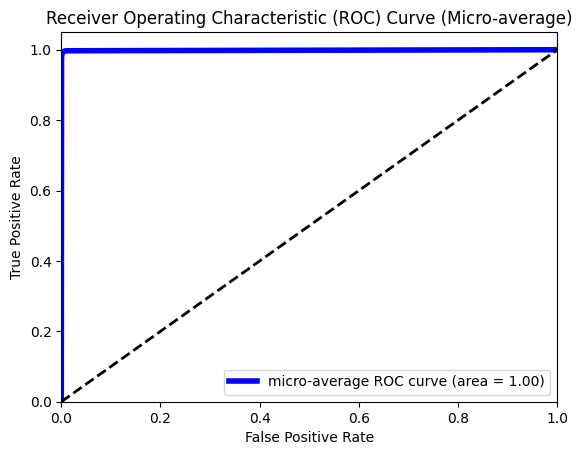

In [35]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='blue', linestyle='-', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Micro-average)')
plt.legend(loc="lower right")
plt.show()

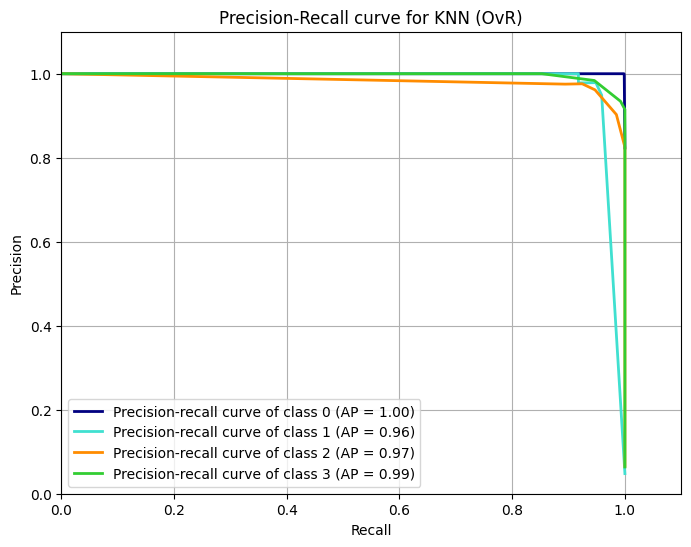

In [36]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(y_train.unique())):
    precision[i], recall[i], _ = precision_recall_curve(np.array(y_test == i), y_prob[:, i])
    average_precision[i] = average_precision_score(np.array(y_test == i), y_prob[:, i])

plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange', 'limegreen']
for i, color in zip(range(len(y_train.unique())), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label='Precision-recall curve of class {0} (AP = {1:0.2f})'
                   ''.format(i, average_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for KNN (OvR)')
plt.xlim([0.0, 1.1])
plt.ylim([0.0, 1.1])

plt.legend(loc="best")
plt.grid(True)
plt.show()

In [37]:
cm = confusion_matrix(y_test, y_pred)
cm
cm.astype(int)

array([[1665,    2,    0,    1],
       [   0,   92,    4,    1],
       [   0,    0,  125,    7],
       [   0,    0,    1,  128]])

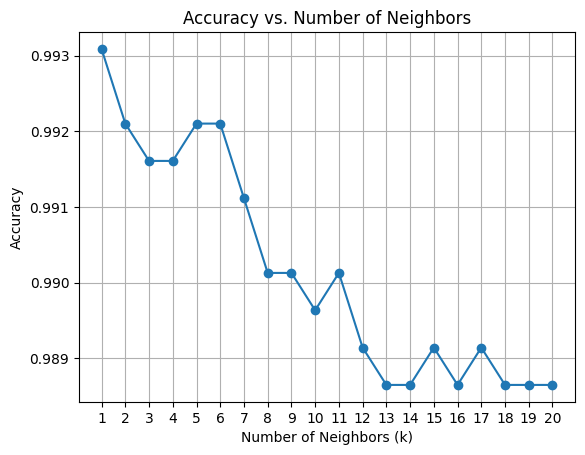

In [38]:
# Calculate accuracy for different number of neighbors
neighbors = list(range(1, 21))
accuracies = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot accuracy vs. number of neighbors
plt.figure()
plt.plot(neighbors, accuracies, marker='o')
plt.title('Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.grid(True)
plt.show()

# Knn having Manhattan distance

In [39]:
from sklearn.neighbors import KNeighborsClassifier

#KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
knn = KNeighborsClassifier(p=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(p=1)

In [40]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
manhattan_knn = accuracy_score(y_test, y_pred)

In [42]:
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
output.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,3,3


In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_test, y_pred)

0.9960513326752222

In [44]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1668
           1       0.99      0.98      0.98        97
           2       0.97      0.98      0.98       132
           3       0.98      0.98      0.98       129

    accuracy                           1.00      2026
   macro avg       0.98      0.99      0.99      2026
weighted avg       1.00      1.00      1.00      2026



In [45]:
y_test, y_pred

(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [46]:
y_pred.dtype, y_test.dtype
y_test = np.array(y_test)
y_pred = np.array(y_pred)

In [47]:
cm = confusion_matrix(y_test, y_pred)
cm
cm.astype(int)

array([[1666,    1,    0,    1],
       [   0,   95,    2,    0],
       [   0,    0,  130,    2],
       [   0,    0,    2,  127]])

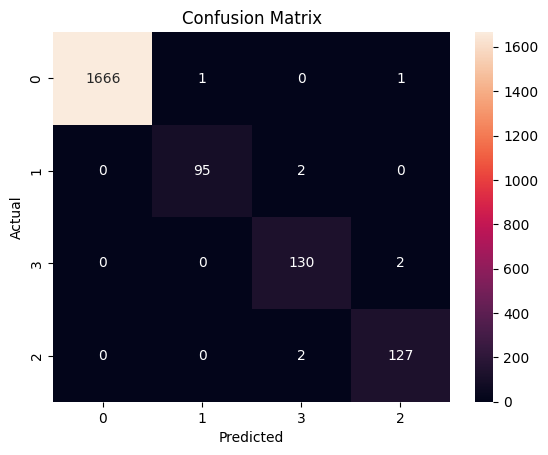

In [48]:
targets = y_train.unique()

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5, 2.5, 3.5], targets)
plt.yticks([0.5, 1.5, 2.5, 3.5], targets)
plt.title('Confusion Matrix')
plt.show()

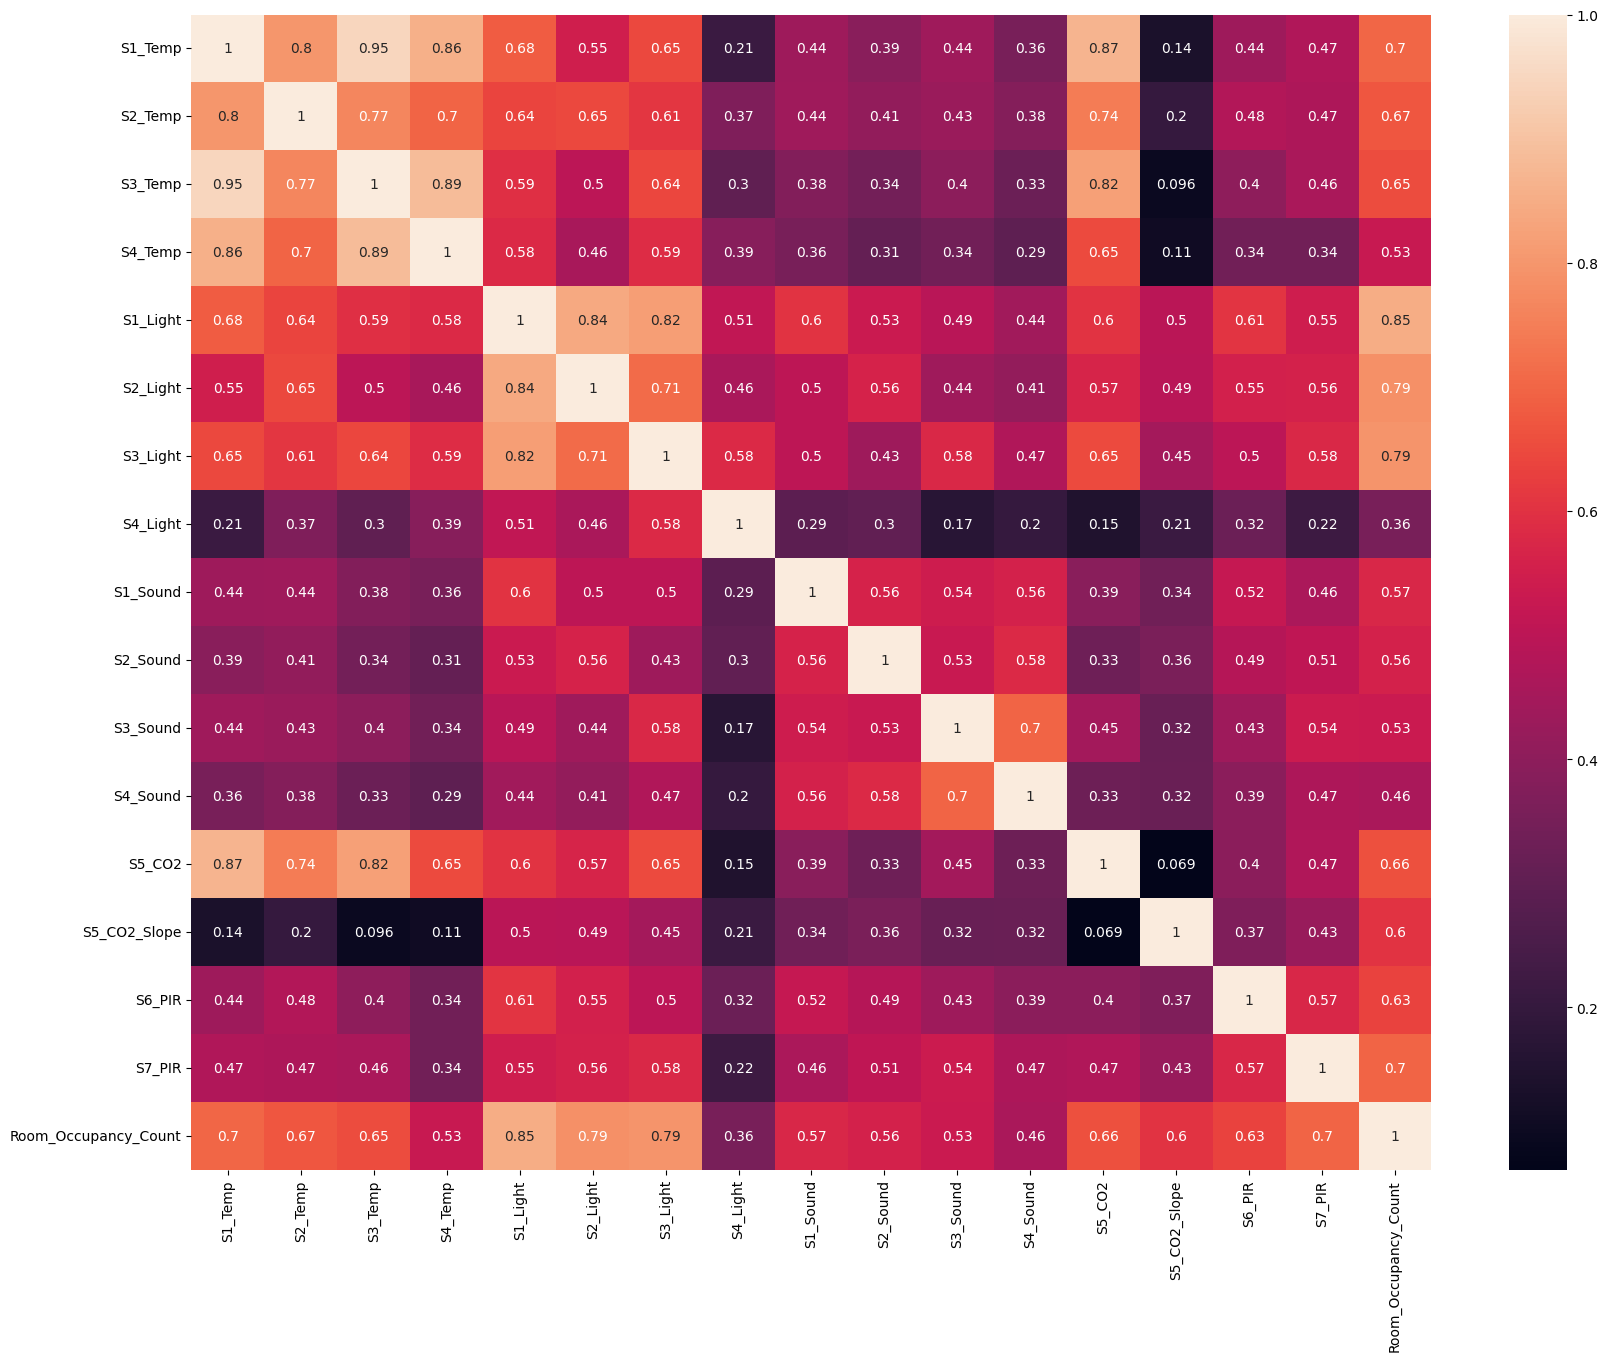

In [49]:
var = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(var, annot=True)
plt.show()

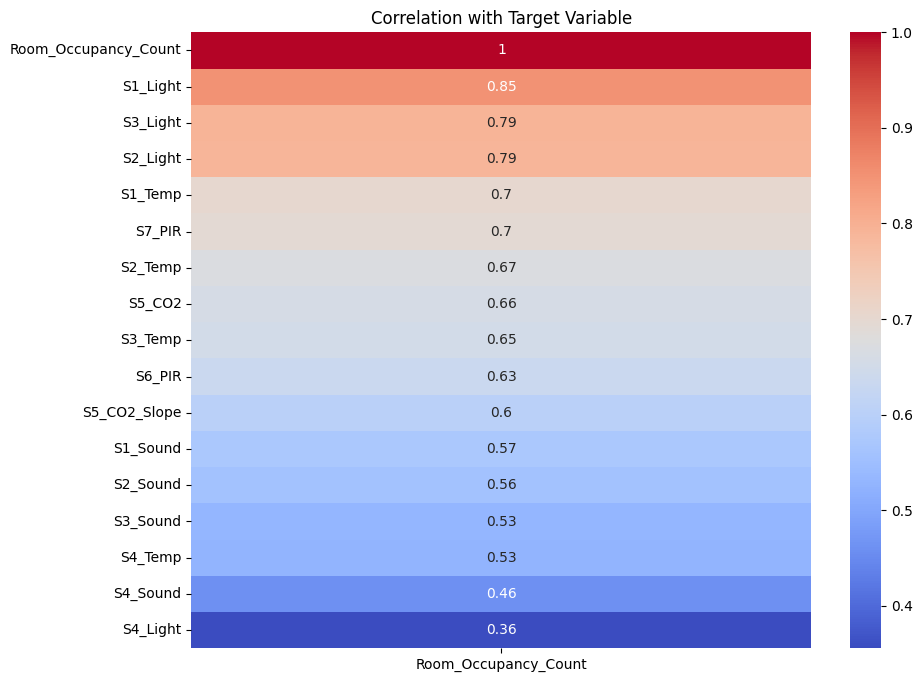

In [50]:
target = 'Room_Occupancy_Count'  # Replace with your actual target variable name
target_correlations = var[[target]].sort_values(by=target, ascending=False)

# Step 4: Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(target_correlations, annot=True, cmap='coolwarm')
plt.title('Correlation with Target Variable')
plt.show()


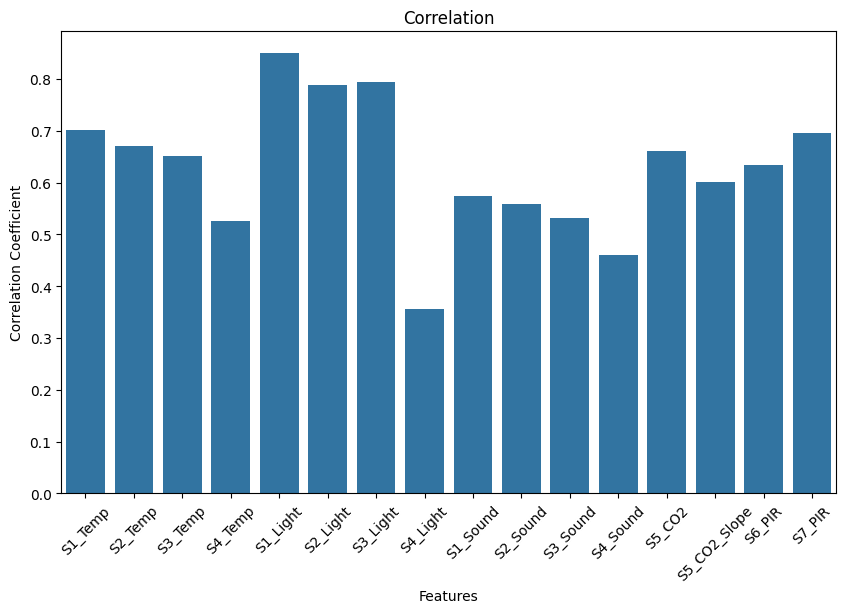

In [51]:
correlations = df.corr()['Room_Occupancy_Count'].drop('Room_Occupancy_Count')  # Drop 'Class' column since we want feature correlations

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=correlations)
plt.title('Correlation')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

In [52]:
correlations_sorted = correlations.sort_values(ascending=False)[:5]
correlations_sorted

S1_Light    0.849058
S3_Light    0.793081
S2_Light    0.788764
S1_Temp     0.700868
S7_PIR      0.695138
Name: Room_Occupancy_Count, dtype: float64

In [53]:
y_prob = knn.predict_proba(X_test)
y_prob

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

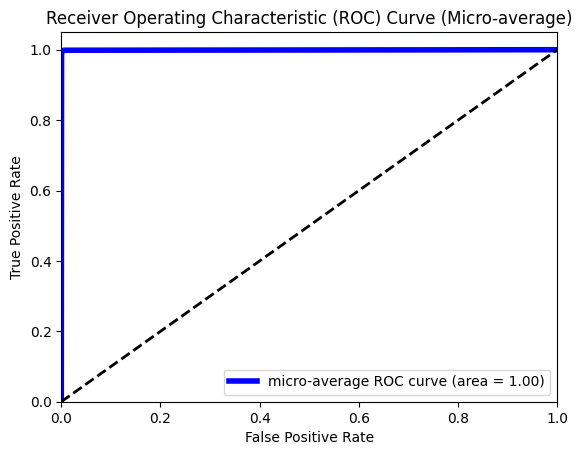

In [54]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='blue', linestyle='-', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Micro-average)')
plt.legend(loc="lower right")
plt.show()

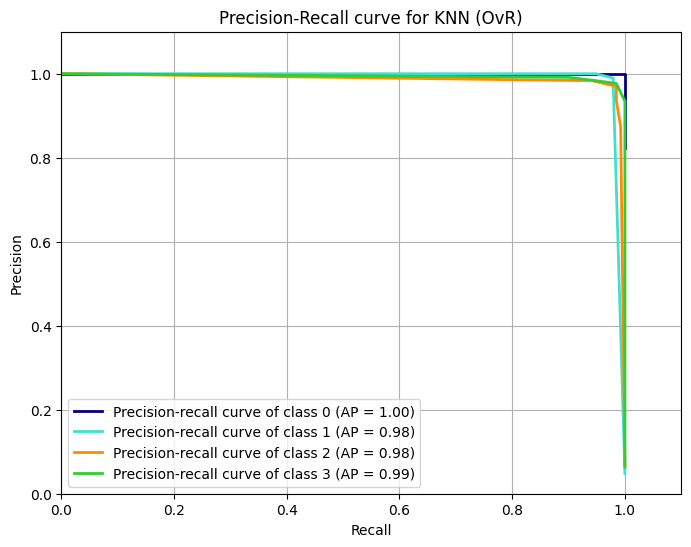

In [55]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(y_train.unique())):
    precision[i], recall[i], _ = precision_recall_curve(np.array(y_test == i), y_prob[:, i])
    average_precision[i] = average_precision_score(np.array(y_test == i), y_prob[:, i])

plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange', 'limegreen']
for i, color in zip(range(len(y_train.unique())), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label='Precision-recall curve of class {0} (AP = {1:0.2f})'
                   ''.format(i, average_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for KNN (OvR)')
plt.xlim([0.0, 1.1])
plt.ylim([0.0, 1.1])

plt.legend(loc="best")
plt.grid(True)
plt.show()

In [56]:
cm = confusion_matrix(y_test, y_pred)
cm
cm.astype(int)

array([[1666,    1,    0,    1],
       [   0,   95,    2,    0],
       [   0,    0,  130,    2],
       [   0,    0,    2,  127]])

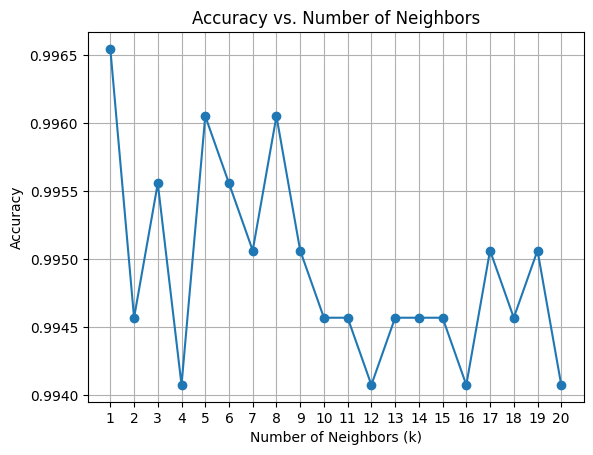

In [57]:
# Calculate accuracy for different number of neighbors
neighbors = list(range(1, 21))
accuracies = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, p=1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot accuracy vs. number of neighbors
plt.figure()
plt.plot(neighbors, accuracies, marker='o')
plt.title('Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.grid(True)
plt.show()

# Wighted Knn

In [58]:
from sklearn.metrics.pairwise import euclidean_distances

In [59]:
feature_weights = np.random.rand(X_train.shape[1])

def weighted_euclidean(X, Y, feature_weights):
    X_scaled = X * feature_weights
    Y_scaled = Y * feature_weights
    return np.sqrt(((X_scaled - Y_scaled) ** 2).sum())

In [60]:
knn = KNeighborsClassifier(n_neighbors=5,
                           metric=weighted_euclidean,
                           metric_params={'feature_weights': feature_weights})

In [61]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric=<function weighted_euclidean at 0x7b4ed68dd750>,
                     metric_params={'feature_weights': array([0.09128618, 0.42024239, 0.97334348, 0.37954903, 0.45521628,
       0.85918999, 0.75720523, 0.4723231 , 0.33309309, 0.12617261,
       0.24992877, 0.29245697, 0.99449066, 0.74555449, 0.13592457,
       0.38544144])})

In [62]:
y_pred = knn.predict(X_test)

In [64]:
weighted_knn = accuracy_score(y_test, y_pred)

In [65]:
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
output.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,3,3


In [66]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_test, y_pred)

0.9950641658440277

In [67]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1668
           1       0.98      0.98      0.98        97
           2       0.96      0.98      0.97       132
           3       0.98      0.97      0.98       129

    accuracy                           1.00      2026
   macro avg       0.98      0.98      0.98      2026
weighted avg       1.00      1.00      1.00      2026



In [68]:
cm = confusion_matrix(y_test, y_pred)
cm
cm.astype(int)

array([[1667,    0,    1,    0],
       [   0,   95,    2,    0],
       [   0,    1,  129,    2],
       [   0,    1,    3,  125]])

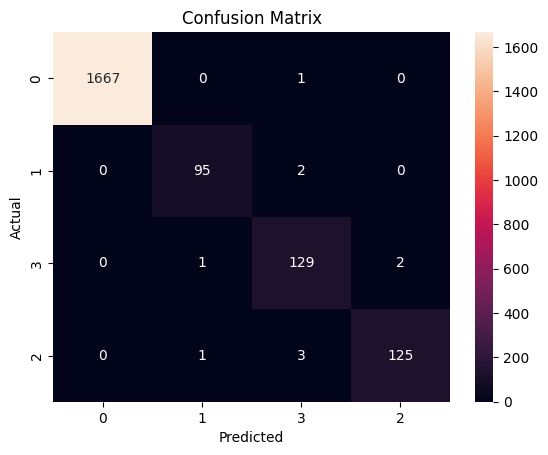

In [69]:
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5, 2.5, 3.5], targets)
plt.yticks([0.5, 1.5, 2.5, 3.5], targets)

plt.title('Confusion Matrix')
plt.show()

In [71]:
correlations_sorted = correlations.sort_values(ascending=False)[:5]
correlations_sorted

S1_Light    0.849058
S3_Light    0.793081
S2_Light    0.788764
S1_Temp     0.700868
S7_PIR      0.695138
Name: Room_Occupancy_Count, dtype: float64

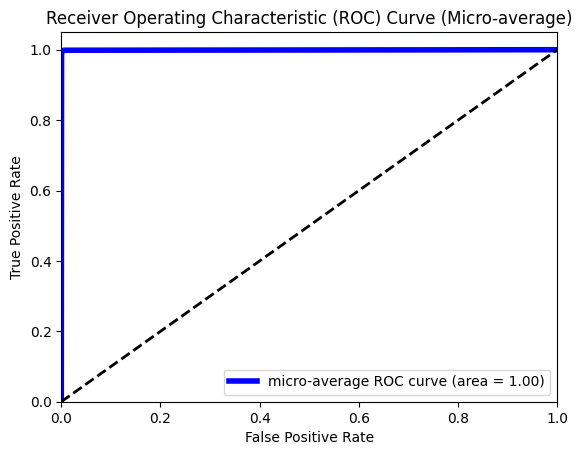

In [70]:
# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='blue', linestyle='-', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Micro-average)')
plt.legend(loc="lower right")
plt.show()

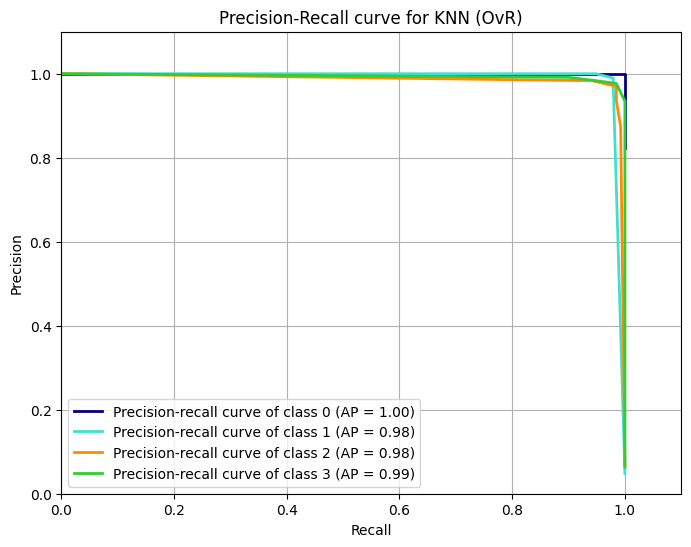

In [72]:
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(y_train.unique())):
    precision[i], recall[i], _ = precision_recall_curve(np.array(y_test == i), y_prob[:, i])
    average_precision[i] = average_precision_score(np.array(y_test == i), y_prob[:, i])

plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange', 'limegreen']
for i, color in zip(range(len(y_train.unique())), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label='Precision-recall curve of class {0} (AP = {1:0.2f})'
                   ''.format(i, average_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for KNN (OvR)')
plt.xlim([0.0, 1.1])
plt.ylim([0.0, 1.1])

plt.legend(loc="best")
plt.grid(True)
plt.show()

# Plot of accuracy


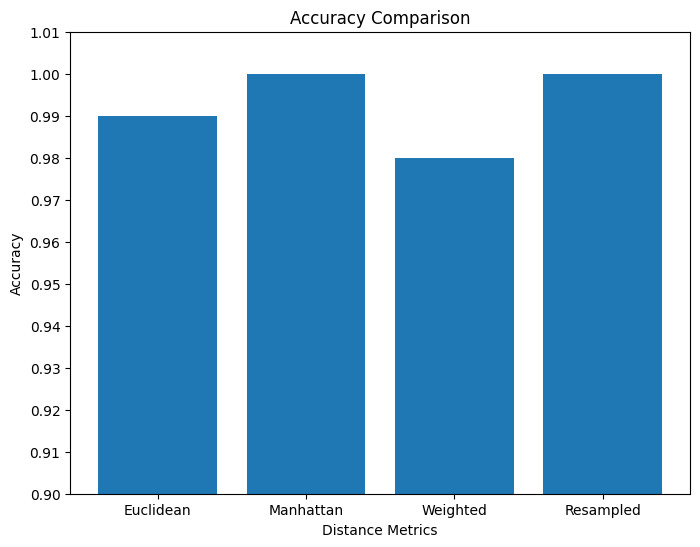

In [83]:
labels = ['Euclidean', 'Manhattan', 'Weighted', 'Resampled']
accuracies = [0.99, 1.00, 0.98, 1.00]

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies)
plt.xlabel('Distance Metrics')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim(0.90, 1.01)  # Adjusting y-axis limits for better visualization
plt.yticks(np.arange(0.90, 1.02, 0.01))  # Setting y-ticks with a specific range and step
plt.show()